<a href="https://colab.research.google.com/github/gurpreetsahotasingh288-gif/Python_program/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix_dataset=pd.read_csv('/content/drive/MyDrive/Netflix dataset (1)/Copy of combined_data_1.txt.zip',header=None,names=['Cust_ID','Rating',
                                                                                                                ],usecols=[0,1])

In [4]:
netflix_dataset.head()

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
netflix_dataset.isnull().sum()

,0
Cust_ID,0
Rating,4499


In [6]:
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count['Rating']
movie_count

4499

In [7]:
total_count=netflix_dataset['Cust_ID'].unique()
total_count

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [8]:
total_count=netflix_dataset['Cust_ID'].nunique()

In [9]:
total_count

475257

In [10]:
customer_count=total_count-movie_count
customer_count

470758

In [11]:
rating_count=netflix_dataset['Rating'].count()-movie_count
rating_count

24049265

In [12]:
star = netflix_dataset.groupby('Rating')['Rating'].count()

In [13]:
star

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


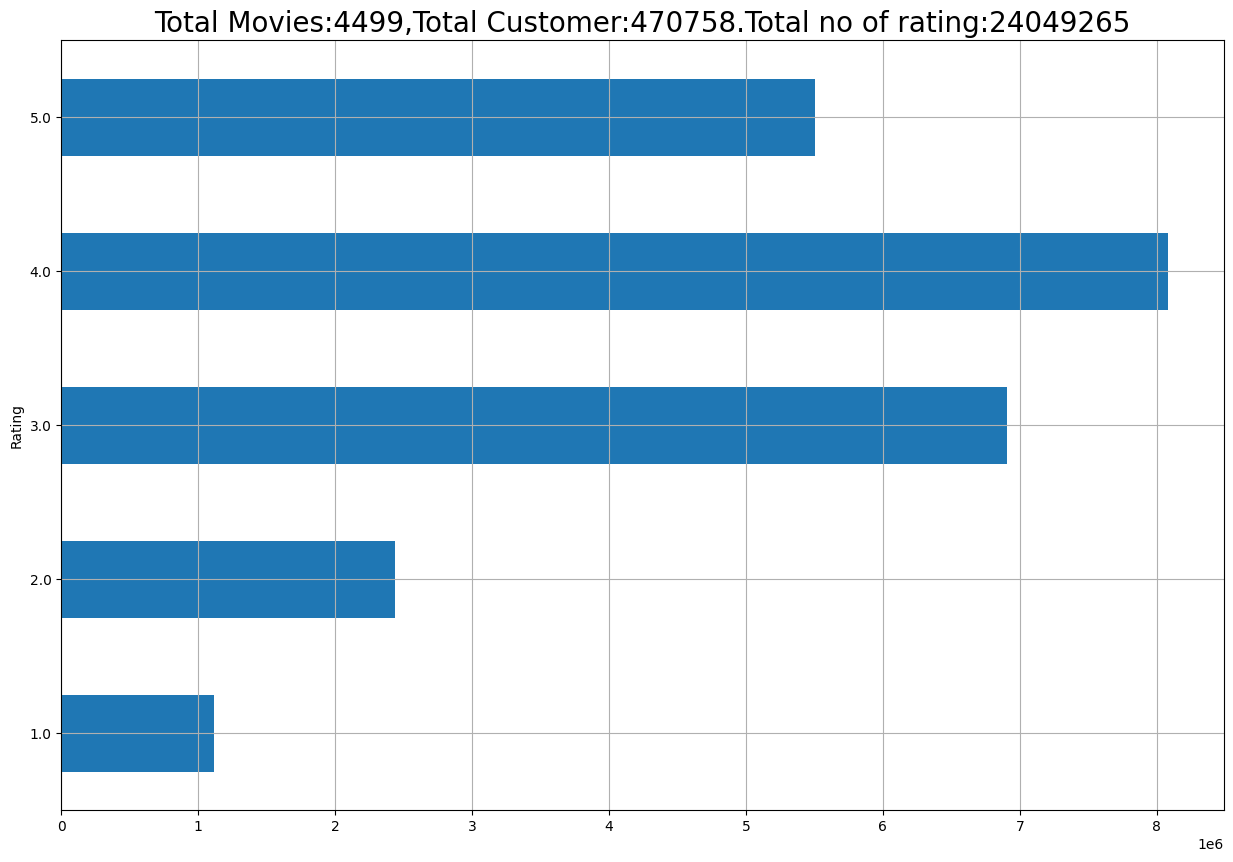

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
star.plot(kind='barh', legend=False, ax=ax)
plt.title(f'Total Movies:{movie_count},Total Customer:{customer_count}.Total no of rating:{rating_count}',fontsize=20)
plt.grid()
plt.show()

In [15]:
movie_id=None
movie_np=[]

for i in netflix_dataset['Cust_ID']:
  if ":" in i:
    movie_id=int(i.replace(':',''))
    movie_np.append(movie_id)

In [16]:
movie_np

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [17]:
# Create a new column 'Movie_ID'
# Mark rows that are movie IDs by checking if 'Cust_ID' contains ':'
# Convert the movie ID string to an integer, otherwise set to NaN
netflix_dataset['Movie_ID'] = netflix_dataset['Cust_ID'].apply(
    lambda x: int(x.replace(':', '')) if ':' in str(x) else np.nan
)

# Forward fill the 'Movie_ID' column to propagate movie IDs to all rating rows
netflix_dataset['Movie_ID'] = netflix_dataset['Movie_ID'].ffill()

# Drop the rows that were originally movie titles (where Rating is NaN)
netflix_dataset.dropna(subset=['Rating'], inplace=True)

# Convert 'Movie_ID' and 'Cust_ID' to integer type
netflix_dataset['Movie_ID'] = netflix_dataset['Movie_ID'].astype(int)
netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)

In [18]:
netflix_dataset['Movie_ID']

,Movie_ID
1,1
2,1
3,1
4,1
5,1
...,...
24058258,4499
24058259,4499
24058260,4499
24058261,4499


In [19]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [20]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   int64  
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [21]:
dataset_movie_summary=netflix_dataset.groupby('Movie_ID')['Rating'].count()
dataset_movie_summary

,Rating
Movie_ID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [22]:
movie_benchmark=round(dataset_movie_summary.quantile(0.6),0)
movie_benchmark

908.0

In [23]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_ID', length=2699)

In [24]:
len(drop_movie_list)

2699

In [25]:
dataset_cust_summary=netflix_dataset.groupby('Cust_ID')['Rating'].count()
dataset_cust_summary

,Rating
Cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [26]:
customer_benchmark=round(dataset_cust_summary.quantile(0.6),0)
customer_benchmark

36.0

In [27]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary<customer_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_ID', length=282042)

In [28]:
len(drop_cust_list)

282042

In [29]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_ID'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_ID'].isin(drop_cust_list)]

In [30]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [31]:
df_title=pd.read_csv('/content/drive/MyDrive/Netflix dataset (1)/Copy of movie_titles.csv',encoding='ISO-8859-1',header=None,
                      names=['Movie_ID','Year','Name'],usecols=[0,1,2])
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [32]:
pip install numpy==1.26.4

In [33]:
!pip install scikit-surprise

In [34]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [35]:
reader=Reader()

In [36]:
data=Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_ID','Rating']][:100000],reader)

In [37]:
data

In [38]:
model=SVD()

In [39]:
cross_validate(model,data,measures=['RMSE'],cv=3,verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0226  1.0155  1.0216  1.0199  0.0031  
Fit time          1.64    3.60    5.49    3.58    1.57    
Test time         0.28    0.74    0.72    0.58    0.22    


{'test_rmse': array([1.02263317, 1.01552744, 1.02157719]),
 'fit_time': (1.6433451175689697, 3.602241277694702, 5.48856258392334),
 'test_time': (0.27572083473205566, 0.7422220706939697, 0.7215988636016846)}

In [40]:
user_rating=netflix_dataset[netflix_dataset['Cust_ID']==1331154]

In [41]:
user_rating

,Cust_ID,Rating,Movie_ID
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [57]:
Actual_df=user_rating['Rating']
Actual_df

,Rating
697,4.0
5178,4.0
31460,3.0
92840,4.0
224761,3.0
...,...
23439584,4.0
23546489,2.0
23649431,4.0
23844441,3.0


In [42]:
user_1331154=df_title.copy()
user_1331154

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [43]:
user_1331154=user_1331154[~user_1331154['Movie_ID'].isin(drop_movie_list)].copy()

In [44]:
user_1331154

,Movie_ID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [45]:
user_1331154['Estimated_Score']=user_1331154['Movie_ID'].apply(lambda x: model.predict(1331154,x).est)

In [46]:
user_1331154

,Movie_ID,Year,Name,Estimated_Score
2,3,1997.0,Character,3.838914
4,5,2004.0,The Rise and Fall of ECW,4.109917
5,6,1997.0,Sick,3.302343
7,8,2004.0,What the #$*! Do We Know!?,3.810418
15,16,1996.0,Screamers,2.923412
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.674847
17766,17767,2004.0,Fidel Castro: American Experience,3.674847
17767,17768,2000.0,Epoch,3.674847
17768,17769,2003.0,The Company,3.674847


In [47]:
top_rated_movies=user_1331154.sort_values(by="Estimated_Score",ascending=False)

In [49]:
top_rated_movies

,Movie_ID,Year,Name,Estimated_Score
4,5,2004.0,The Rise and Fall of ECW,4.109917
29,30,2003.0,Something's Gotta Give,3.998530
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.968090
17,18,1994.0,Immortal Beloved,3.966425
27,28,2002.0,Lilo and Stitch,3.894604
...,...,...,...,...
16,17,2005.0,7 Seconds,3.369443
5,6,1997.0,Sick,3.302343
23,24,1981.0,My Bloody Valentine,3.201096
15,16,1996.0,Screamers,2.923412


In [55]:
Estimated_df=user_1331154['Estimated_Score']

In [56]:
Estimated_df

,Estimated_Score
2,3.838914
4,4.109917
5,3.302343
7,3.810418
15,2.923412
...,...
17765,3.674847
17766,3.674847
17767,3.674847
17768,3.674847


In [58]:
Actual_df

,Rating
697,4.0
5178,4.0
31460,3.0
92840,4.0
224761,3.0
...,...
23439584,4.0
23546489,2.0
23649431,4.0
23844441,3.0


In [59]:
merge=pd.concat([Actual_df,Estimated_df],axis=1)

In [60]:
merge

,Rating,Estimated_Score
697,4.0,NaN
5178,4.0,3.674847
31460,3.0,NaN
92840,4.0,NaN
224761,3.0,NaN
...,...,...
17765,NaN,3.674847
17766,NaN,3.674847
17767,NaN,3.674847
17768,NaN,3.674847
